INFO:root:creating a Pool of 4 workers


INFO:root:creating a Pool of 4 workers


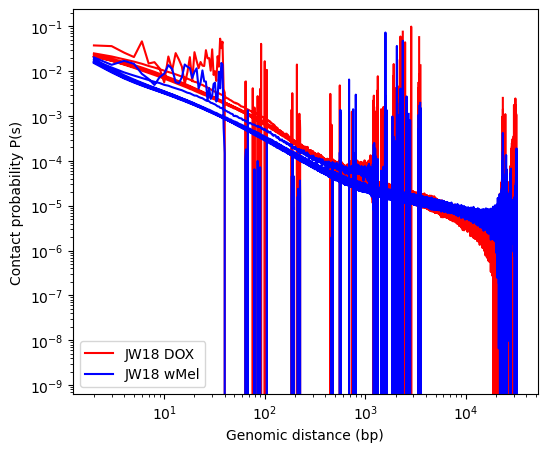

In [9]:
#Aggregate Contact Probability Plot (P(s) Curve)

import cooltools
import cooler
import numpy as np
import matplotlib.pyplot as plt

directory = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots"
resolution=1000 # Options: ['/resolutions/1000', '/resolutions/2000', '/resolutions/4000', '/resolutions/8000', '/resolutions/16000', '/resolutions/32000', '/resolutions/64000', '/resolutions/128000', '/resolutions/256000', '/resolutions/512000']

clr1 = cooler.Cooler(f"/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/JW18-DOX.matrix_1kb.mcool::/resolutions/{resolution}")
clr2 = cooler.Cooler(f"/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/JW18-wMel.matrix_1kb.mcool::/resolutions/{resolution}")

expected1 = cooltools.expected_cis(clr1, view_df=None, nproc=4)
expected2 = cooltools.expected_cis(clr2, view_df=None, nproc=4)

plt.figure(figsize=(6, 5))
plt.loglog(expected1["dist"], expected1["balanced.avg"], label="JW18 DOX", color='red')
plt.loglog(expected2["dist"], expected2["balanced.avg"], label="JW18 wMel", color='blue')
plt.xlabel("Genomic distance (bp)")
plt.ylabel("Contact probability P(s)")
plt.legend()
plt.savefig(f"{directory}/contact_probability_by_genomic_distance__{resolution}.pdf")
plt.show()

This aggregate contact probability plot (P(s) curve) shows how contact frequency decays with increasing genomic distance in your JW18 DOX (red) and JW18 wMel (blue) conditions.

Interpreting the Plot
	1.	Overall trend:
	•	Contact probability decreases as genomic distance increases, which is expected for chromatin interaction data.
	•	The red (DOX) and blue (wMel) curves follow a similar downward trend but with noticeable differences in amplitude.
	2.	Differences between conditions:
	•	At short distances (left side, ~10¹-10² bp): JW18 DOX has higher contact probabilities than JW18 wMel, meaning chromatin interactions are stronger in this condition at short ranges.
	•	At medium distances (10²-10³ bp): The interaction probabilities for DOX and wMel converge, indicating that large-scale chromatin interactions are more similar between conditions.
	•	Noise/Artifacts: The jagged fluctuations could be due to low read counts, undersampling, or binning issues.
	3.	Possible biological interpretation:
	•	If JW18 wMel (blue) has reduced contact probability at short distances, it could indicate more open chromatin or weaker short-range interactions.
	•	If JW18 DOX (red) maintains higher contact probability, it could suggest a more compact chromatin structure in this condition.

Is this an expected result?
	•	If Wolbachia infection (wMel) disrupts chromatin organization, a reduction in short-range interactions would be expected.
	•	If doxycycline (DOX) treatment affects chromatin compaction, an increase in short-range interactions (higher P(s)) could be due to changes in nucleosome positioning or chromatin remodeling.
	•	The fluctuations and sudden drops could be technical artifacts—do you have enough reads in both conditions? Are there normalization differences?


In [10]:
import cooler
import cooltools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your Hi-C/Micro-C data at the appropriate resolution
clr1 = cooler.Cooler("/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/JW18-DOX.matrix_1kb.mcool::/resolutions/64000")
clr2 = cooler.Cooler("/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/JW18-wMel.matrix_1kb.mcool::/resolutions/64000")

# Compute expected contact probability (P(s)) genome-wide
expected_dox = cooltools.expected_cis(clr1)
expected_wmel = cooltools.expected_cis(clr2)

In [11]:
print(expected_dox.columns)
print(expected_wmel.columns)

Index(['region1', 'region2', 'dist', 'dist_bp', 'contact_frequency', 'n_total',
       'n_valid', 'count.sum', 'balanced.sum', 'count.avg', 'balanced.avg',
       'balanced.avg.smoothed', 'balanced.avg.smoothed.agg'],
      dtype='object')
Index(['region1', 'region2', 'dist', 'dist_bp', 'contact_frequency', 'n_total',
       'n_valid', 'count.sum', 'balanced.sum', 'count.avg', 'balanced.avg',
       'balanced.avg.smoothed', 'balanced.avg.smoothed.agg'],
      dtype='object')


In [12]:
# Extract chromosome names from region1
expected_dox["chromosome"] = expected_dox["region1"].str.split(":").str[0]
expected_wmel["chromosome"] = expected_wmel["region1"].str.split(":").str[0]

In [13]:
# Extract unique chromosome names
chromosomes = expected_dox["chromosome"].unique()

# Store per-chromosome results
expected_ps = {}

for chrom in chromosomes:
    expected_ps[chrom] = {
        "DOX": expected_dox[expected_dox["chromosome"] == chrom],
        "wMel": expected_wmel[expected_wmel["chromosome"] == chrom]
    }

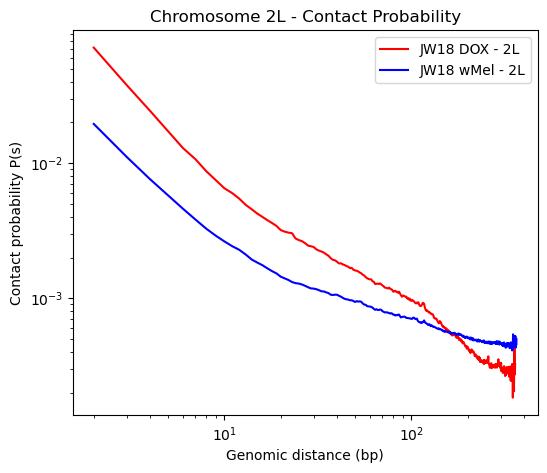

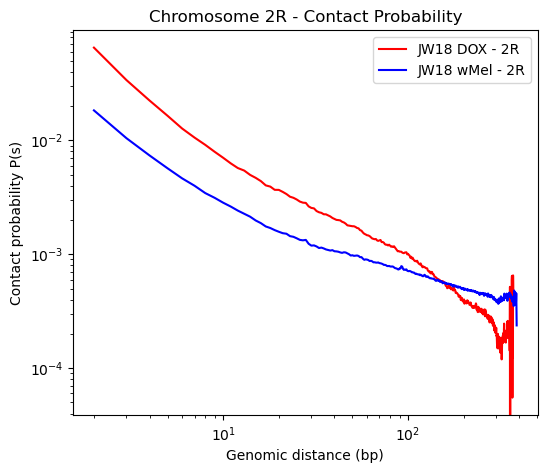

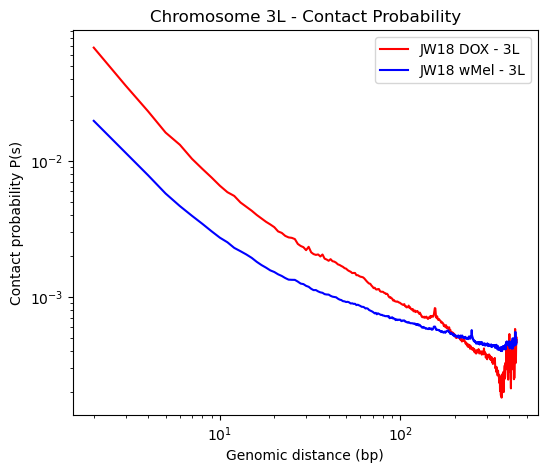

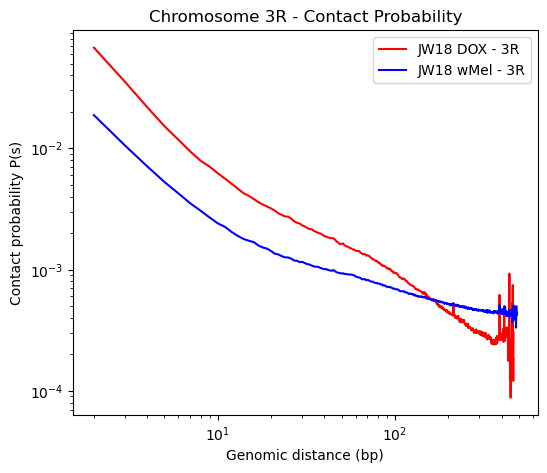

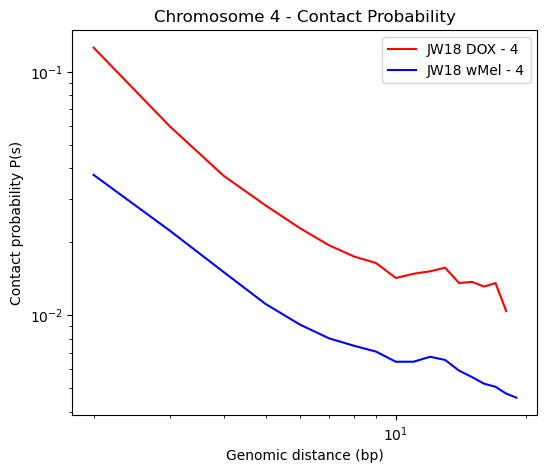

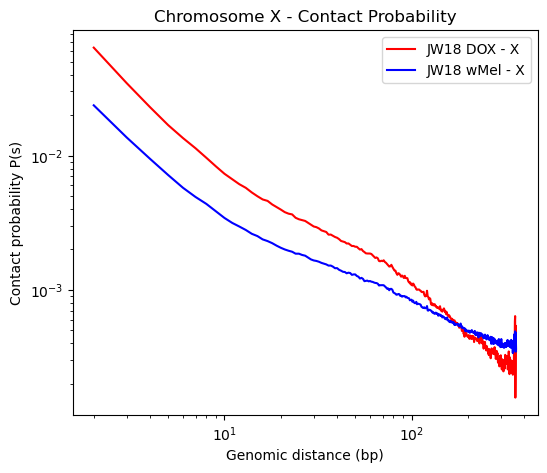

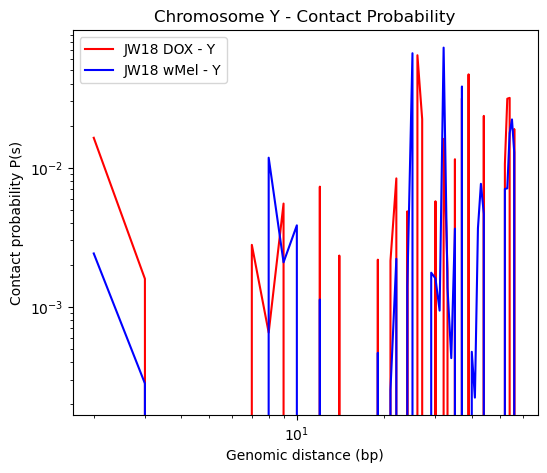

In [14]:
import matplotlib.pyplot as plt

for chrom in chromosomes:
    plt.figure(figsize=(6, 5))

    plt.loglog(expected_ps[chrom]["DOX"]["dist"], expected_ps[chrom]["DOX"]["balanced.avg"], label=f"JW18 DOX - {chrom}", color='red')
    plt.loglog(expected_ps[chrom]["wMel"]["dist"], expected_ps[chrom]["wMel"]["balanced.avg"], label=f"JW18 wMel - {chrom}", color='blue')

    plt.xlabel("Genomic distance (bp)")
    plt.ylabel("Contact probability P(s)")
    plt.title(f"Chromosome {chrom} - Contact Probability")
    plt.legend()
    plt.savefig(f"{directory}/contact_probability_by_genomic_distance_{chrom}_{resolution}.pdf")
    plt.show()

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
file_path_wMel = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/mustache/mustache_v5/1kb/JW18-DOX_JW18-wMel.diffloop1"
file_path_DOX = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/mustache/mustache_v5/1kb/JW18-DOX_JW18-wMel.diffloop2"

# Load the tab-separated files
df_wMel = pd.read_csv(file_path_wMel, sep="\t")
df_DOX = pd.read_csv(file_path_DOX, sep="\t")

# Rename columns for clarity
df_wMel.rename(columns={"FDR": "pvalue", "DETECTION_SCALE": "log2_fc"}, inplace=True)
df_DOX.rename(columns={"FDR": "pvalue", "DETECTION_SCALE": "log2_fc"}, inplace=True)

# Assign log2 fold change direction
df_wMel["log2_fc"] = -df_wMel["log2_fc"]  # Make wMel-enriched interactions negative
df_DOX["log2_fc"] = df_DOX["log2_fc"]  # Keep DOX-enriched interactions positive

# Combine both dataframes
df = pd.concat([df_wMel, df_DOX], ignore_index=True)

# Convert p-values to -log10(p-value)
df["neg_log10_p"] = -np.log10(df["pvalue"])
df["log2_fc"] = df["log2_fc"] + np.random.uniform(-0.3, 0.3, size=len(df))

# Replace infinite values (if any p-value is 0, replace it with the smallest nonzero value)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df["neg_log10_p"].fillna(df["neg_log10_p"].max(), inplace=True)

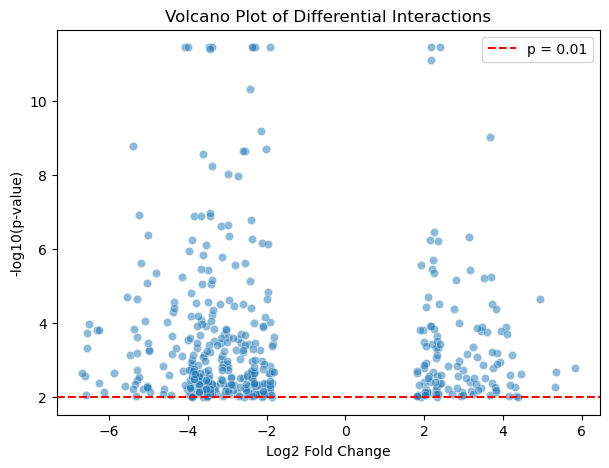

In [16]:
plt.figure(figsize=(7, 5))

# Scatter plot
sns.scatterplot(data=df, x="log2_fc", y="neg_log10_p", alpha=0.5)

# Add horizontal significance threshold (-log10(0.05))
plt.axhline(y=-np.log10(0.01), linestyle="--", color="red", label="p = 0.01")

# Label axes
plt.xlabel("Log2 Fold Change")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot of Differential Interactions")
plt.legend()
plt.savefig(f"{directory}/volcano_plot_micro-c.pdf")
plt.show()

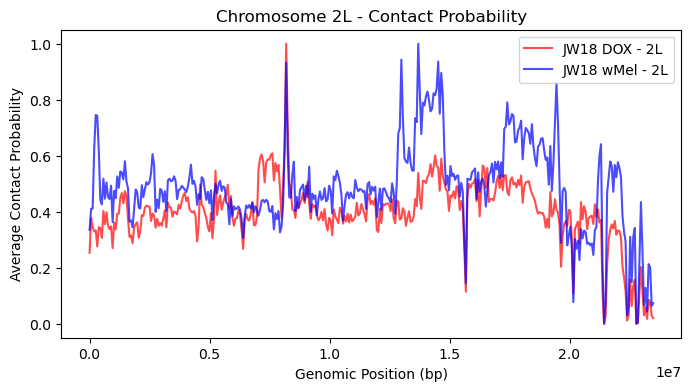

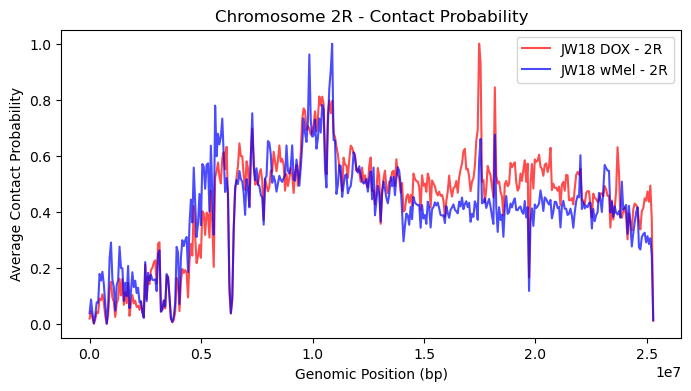

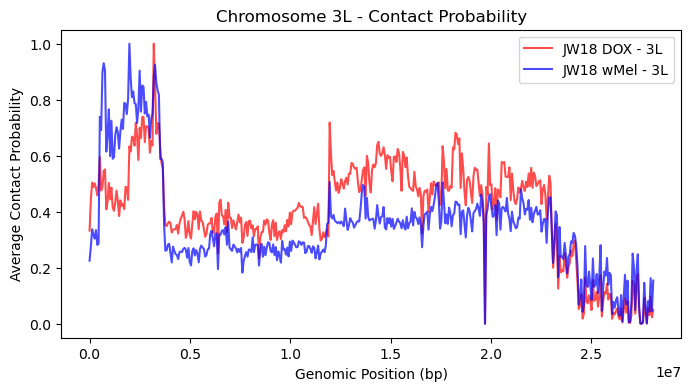

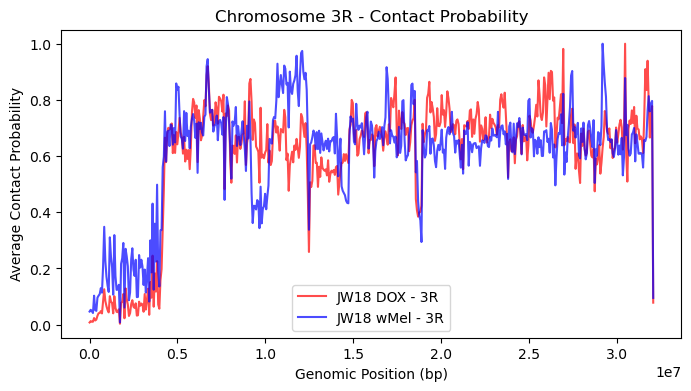

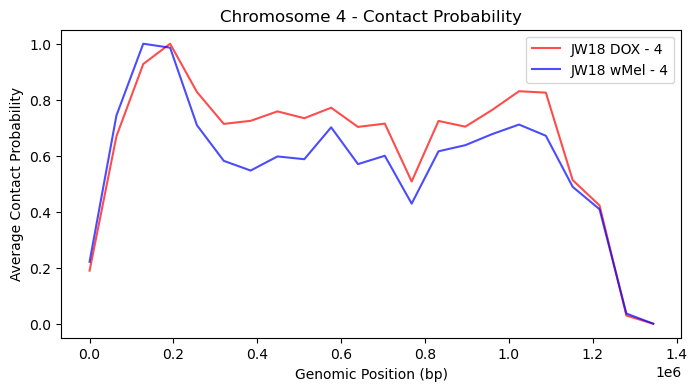

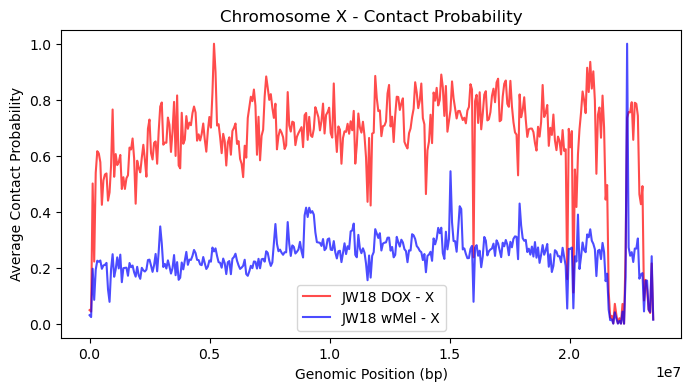

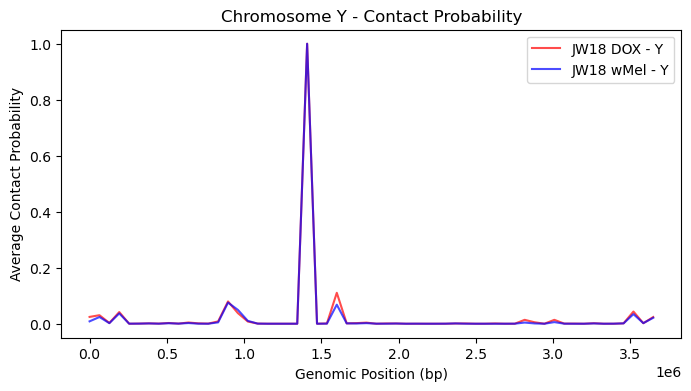

In [17]:
import cooler
import numpy as np
import matplotlib.pyplot as plt

# Load Hi-C data
# clr1 = cooler.Cooler(f"/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/JW18-DOX.matrix_1kb.mcool::/resolutions/{resolution}")
# clr2 = cooler.Cooler(f"/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/JW18-wMel.matrix_1kb.mcool::/resolutions/{resolution}")

# Extract chromosome names
chromosomes = clr1.chromnames

# Store contact probability data
contact_data = {}

for chrom in chromosomes:
    try:
        # Fetch Hi-C contact matrix
        matrix_dox = clr1.matrix(balance=False, sparse=True).fetch(chrom)
        matrix_wmel = clr2.matrix(balance=False, sparse=True).fetch(chrom)

        # Convert sparse to dense
        matrix_dox_dense = np.array(matrix_dox.todense())
        matrix_wmel_dense = np.array(matrix_wmel.todense())

        # Compute mean contact probability
        contact_dox = matrix_dox_dense.mean(axis=1)
        contact_wmel = matrix_wmel_dense.mean(axis=1)

        # Normalize if values are very low
        contact_dox = contact_dox / np.max(contact_dox)
        contact_wmel = contact_wmel / np.max(contact_wmel)

        # Get genomic positions
        bin_table = clr1.bins().fetch(chrom)
        genomic_positions = bin_table["start"].values

        contact_data[chrom] = {
            "genomic_positions": genomic_positions,
            "contact_dox": contact_dox,
            "contact_wmel": contact_wmel,
        }
    except:
        print(f"Skipping chromosome {chrom} due to an issue.")

# Plot separate graphs per chromosome
for chrom in contact_data.keys():
    plt.figure(figsize=(8, 4))
    
    genomic_positions = contact_data[chrom]["genomic_positions"]
    contact_dox = contact_data[chrom]["contact_dox"]
    contact_wmel = contact_data[chrom]["contact_wmel"]

    plt.plot(genomic_positions, contact_dox, label=f"JW18 DOX - {chrom}", color="red", alpha=0.7)
    plt.plot(genomic_positions, contact_wmel, label=f"JW18 wMel - {chrom}", color="blue", alpha=0.7)

    plt.xlabel("Genomic Position (bp)")
    plt.ylabel("Average Contact Probability")
    plt.title(f"Chromosome {chrom} - Contact Probability")
    plt.legend()
    plt.savefig(f"{directory}/average_contact_probability_{chrom}_{resolution}.pdf")
    plt.show()

In [18]:
import pandas as pd

# File paths (TADs stored in the same format as .diffloop files)
file_path_wMel = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/mustache/mustache_v5/1kb/JW18-DOX_JW18-wMel.diffloop1"
file_path_DOX = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/mustache/mustache_v5/1kb/JW18-DOX_JW18-wMel.diffloop2"

# Load TADs as tab-separated files
df_wMel = pd.read_csv(file_path_wMel, sep="\t")
df_DOX = pd.read_csv(file_path_DOX, sep="\t")

# Rename columns for clarity
df_wMel.rename(columns={"FDR": "pvalue", "DETECTION_SCALE": "log2_fc"}, inplace=True)
df_DOX.rename(columns={"FDR": "pvalue", "DETECTION_SCALE": "log2_fc"}, inplace=True)

# Assign log2 fold change direction
df_wMel["log2_fc"] = -df_wMel["log2_fc"]  # Make wMel-enriched interactions negative
df_DOX["log2_fc"] = df_DOX["log2_fc"]  # Keep DOX-enriched interactions positive

# Combine both dataframes
df_tads = pd.concat([df_wMel, df_DOX], ignore_index=True)

# Filter to remove non-significant TADs (optional)
df_tads = df_tads[df_tads["pvalue"] < 0.01]  # Keep only significant TADs

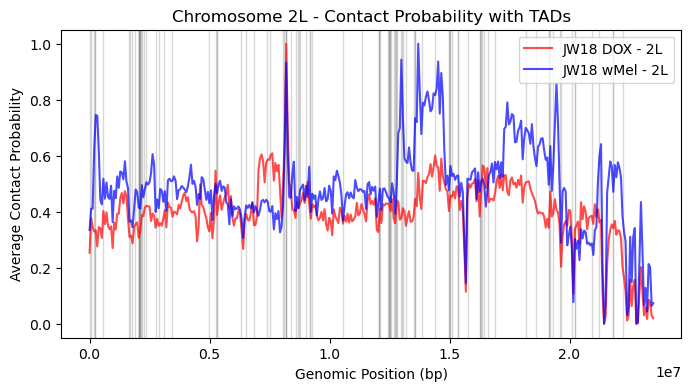

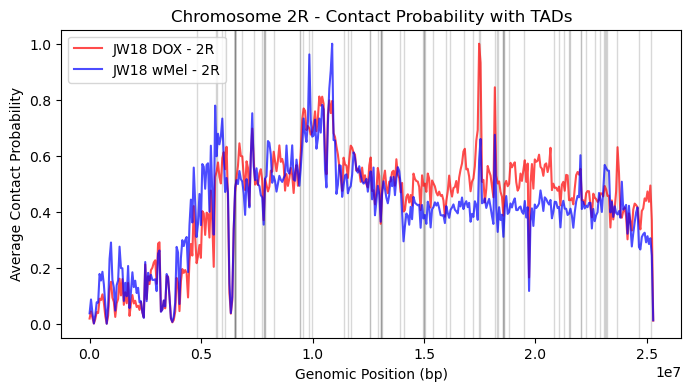

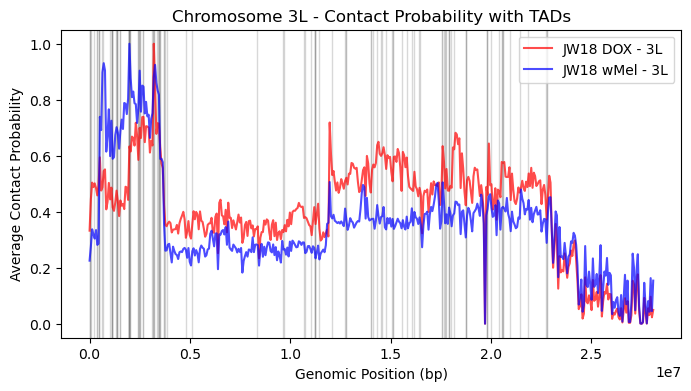

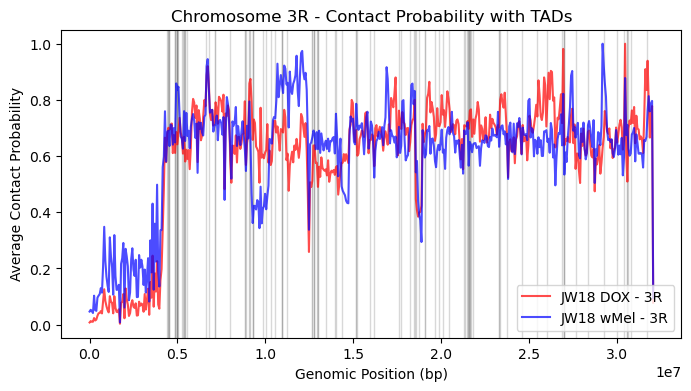

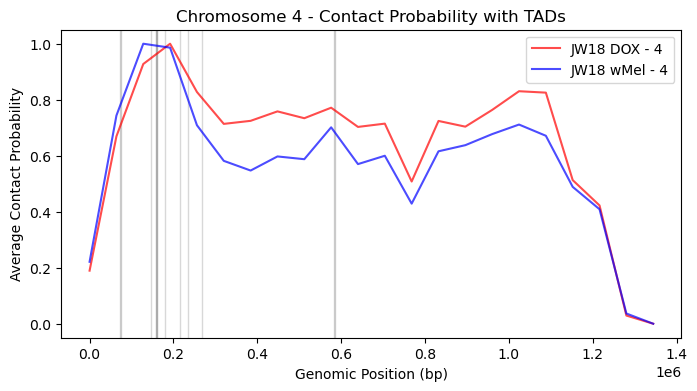

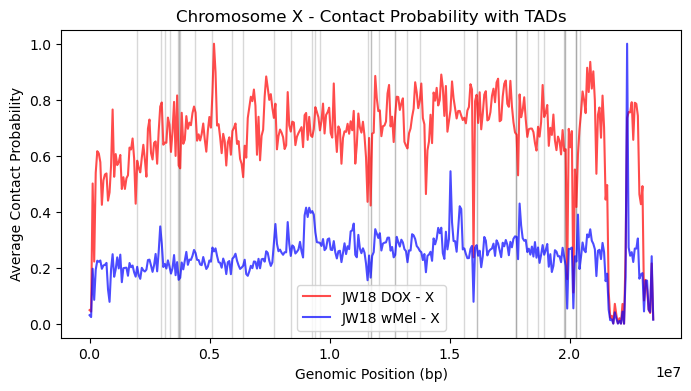

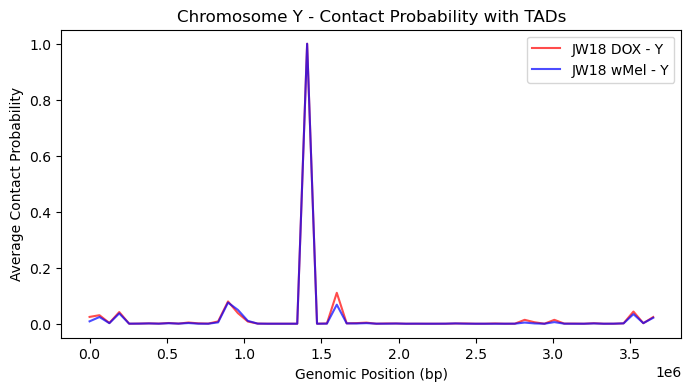

In [19]:
import cooler
import numpy as np
import matplotlib.pyplot as plt


# Extract chromosome names
chromosomes = clr1.chromnames

# Store contact probability data
contact_data = {}

for chrom in chromosomes:
    try:
        # Fetch Hi-C contact matrix
        matrix_dox = clr1.matrix(balance=False, sparse=True).fetch(chrom)
        matrix_wmel = clr2.matrix(balance=False, sparse=True).fetch(chrom)

        # Convert sparse to dense
        matrix_dox_dense = np.array(matrix_dox.todense())
        matrix_wmel_dense = np.array(matrix_wmel.todense())

        # Compute mean contact probability
        contact_dox = matrix_dox_dense.mean(axis=1)
        contact_wmel = matrix_wmel_dense.mean(axis=1)

        # Normalize if values are very low
        contact_dox = contact_dox / np.max(contact_dox)
        contact_wmel = contact_wmel / np.max(contact_wmel)

        # Get genomic positions
        bin_table = clr1.bins().fetch(chrom)
        genomic_positions = bin_table["start"].values

        contact_data[chrom] = {
            "genomic_positions": genomic_positions,
            "contact_dox": contact_dox,
            "contact_wmel": contact_wmel,
        }
    except:
        print(f"Skipping chromosome {chrom} due to an issue.")

# Plot separate graphs per chromosome with TADs
for chrom in contact_data.keys():
    plt.figure(figsize=(8, 4))
    
    genomic_positions = contact_data[chrom]["genomic_positions"]
    contact_dox = contact_data[chrom]["contact_dox"]
    contact_wmel = contact_data[chrom]["contact_wmel"]

    plt.plot(genomic_positions, contact_dox, label=f"JW18 DOX - {chrom}", color="red", alpha=0.7)
    plt.plot(genomic_positions, contact_wmel, label=f"JW18 wMel - {chrom}", color="blue", alpha=0.7)

    # Highlight TADs for the current chromosome
    chrom_tads = df_tads[df_tads["BIN1_CHR"] == chrom]
    for _, row in chrom_tads.iterrows():
        plt.axvspan(row["BIN1_START"], row["BIN1_END"], color="gray", alpha=0.3)  # Shaded TAD region

    plt.xlabel("Genomic Position (bp)")
    plt.ylabel("Average Contact Probability")
    plt.title(f"Chromosome {chrom} - Contact Probability with TADs")
    plt.legend()
    plt.savefig(f"{directory}/average_contact_probability_{chrom}_{resolution}_grey.pdf")
    plt.show()

In [20]:
import pandas as pd

# File paths (TADs stored in the same format as .diffloop files)
file_path_wMel = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/mustache/mustache_v5/1kb/JW18-DOX_JW18-wMel.diffloop1"
file_path_DOX = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/mustache/mustache_v5/1kb/JW18-DOX_JW18-wMel.diffloop2"

# Load TADs as tab-separated files
df_wMel = pd.read_csv(file_path_wMel, sep="\t")
df_DOX = pd.read_csv(file_path_DOX, sep="\t")

# Rename columns for clarity
df_wMel.rename(columns={"FDR": "pvalue", "DETECTION_SCALE": "log2_fc"}, inplace=True)
df_DOX.rename(columns={"FDR": "pvalue", "DETECTION_SCALE": "log2_fc"}, inplace=True)

# Assign log2 fold change direction
df_wMel["log2_fc"] = -df_wMel["log2_fc"]  # Make wMel-enriched interactions negative
df_DOX["log2_fc"] = df_DOX["log2_fc"]  # Keep DOX-enriched interactions positive

# Combine both dataframes
df_tads = pd.concat([df_wMel, df_DOX], ignore_index=True)

# Keep only significant TADs
df_tads = df_tads[df_tads["pvalue"] < 0.05]

# Classify enrichment: DOX (positive log2_fc, red) or wMel (negative log2_fc, blue)
df_tads["color"] = df_tads["log2_fc"].apply(lambda x: "red" if x > 0 else "blue")

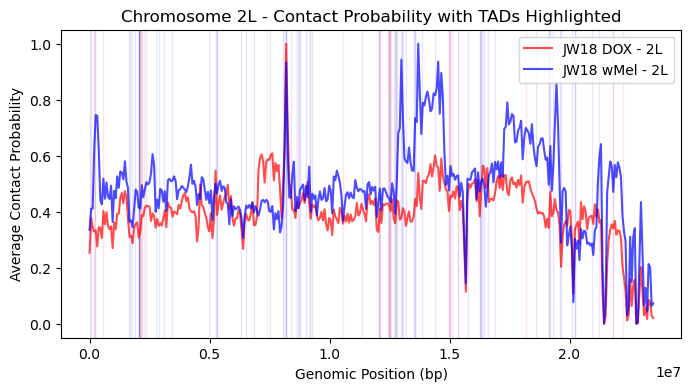

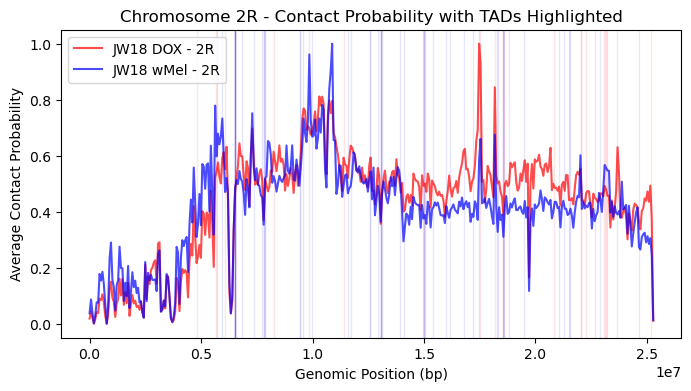

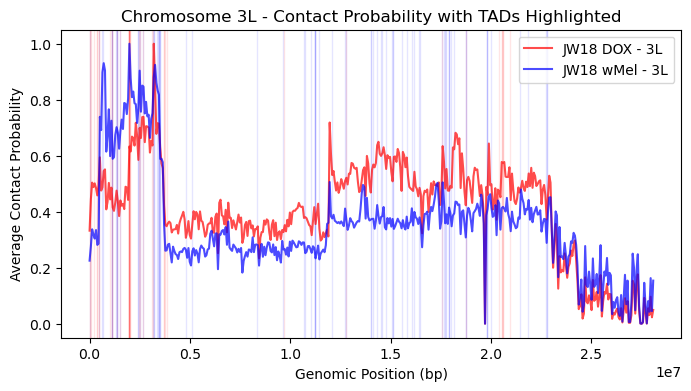

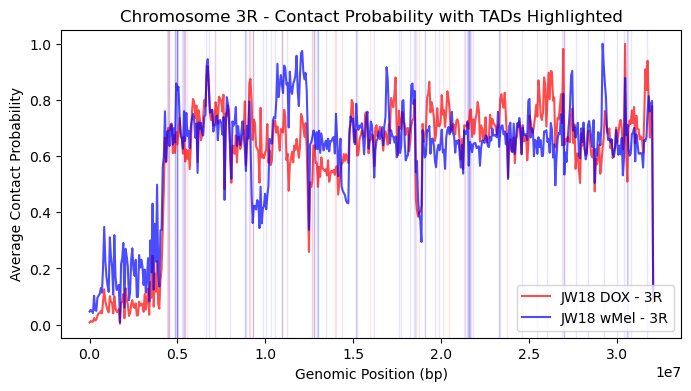

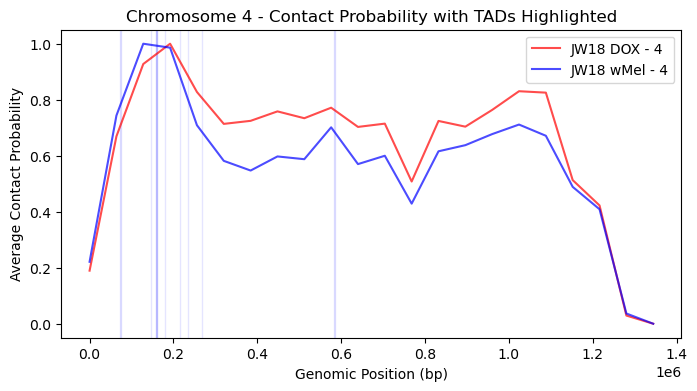

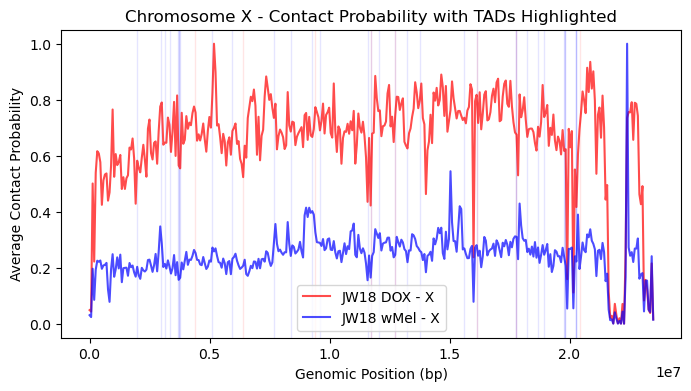

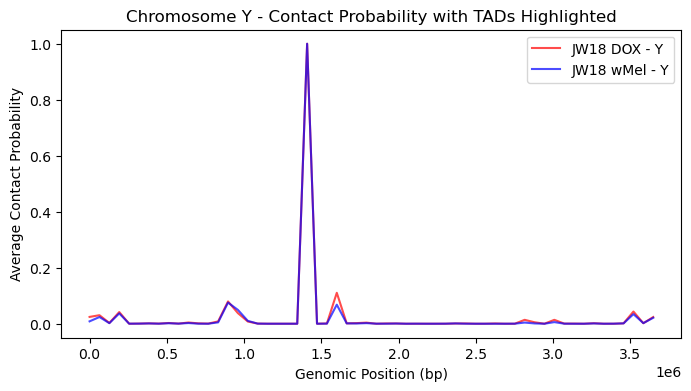

In [21]:
import cooler
import numpy as np
import matplotlib.pyplot as plt


# Extract chromosome names
chromosomes = clr1.chromnames

# Store contact probability data
contact_data = {}

for chrom in chromosomes:
    try:
        # Fetch Hi-C contact matrix
        matrix_dox = clr1.matrix(balance=False, sparse=True).fetch(chrom)
        matrix_wmel = clr2.matrix(balance=False, sparse=True).fetch(chrom)

        # Convert sparse to dense
        matrix_dox_dense = np.array(matrix_dox.todense())
        matrix_wmel_dense = np.array(matrix_wmel.todense())

        # Compute mean contact probability
        contact_dox = matrix_dox_dense.mean(axis=1)
        contact_wmel = matrix_wmel_dense.mean(axis=1)

        # Normalize if values are very low
        contact_dox = contact_dox / np.max(contact_dox)
        contact_wmel = contact_wmel / np.max(contact_wmel)

        # Get genomic positions
        bin_table = clr1.bins().fetch(chrom)
        genomic_positions = bin_table["start"].values

        contact_data[chrom] = {
            "genomic_positions": genomic_positions,
            "contact_dox": contact_dox,
            "contact_wmel": contact_wmel,
        }
    except:
        print(f"Skipping chromosome {chrom} due to an issue.")

# Plot separate graphs per chromosome with TAD shading
for chrom in contact_data.keys():
    plt.figure(figsize=(8, 4))
    
    genomic_positions = contact_data[chrom]["genomic_positions"]
    contact_dox = contact_data[chrom]["contact_dox"]
    contact_wmel = contact_data[chrom]["contact_wmel"]

    plt.plot(genomic_positions, contact_dox, label=f"JW18 DOX - {chrom}", color="red", alpha=0.7)
    plt.plot(genomic_positions, contact_wmel, label=f"JW18 wMel - {chrom}", color="blue", alpha=0.7)

    # Highlight TADs for the current chromosome with transparent shading
    chrom_tads = df_tads[df_tads["BIN1_CHR"] == chrom]
    for _, row in chrom_tads.iterrows():
        plt.axvspan(row["BIN1_START"], row["BIN1_END"], color=row["color"], alpha=0.1)  # Transparent highlighting

    plt.xlabel("Genomic Position (bp)")
    plt.ylabel("Average Contact Probability")
    plt.title(f"Chromosome {chrom} - Contact Probability with TADs Highlighted")
    plt.legend()
    plt.savefig(f"{directory}/average_contact_probability_{chrom}_{resolution}_tads.pdf")

    plt.show()

In [22]:
import cooler
import numpy as np
import matplotlib.pyplot as plt
# Define zoom-in region (example: Chromosome X, 21.9Mb to 22.3Mb)
chromosome_of_interest = "X"
start_bp = 21_600_000
end_bp = 22_250_000

directory="/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots"

def plot_regions(chr='X',start=start_bp,stop=end_bp, clr1=clr1, clr2=clr2, directory=directory):
    # Store contact probability data
    contact_data = {}

    try:
        # Fetch Hi-C contact matrix for the selected chromosome
        matrix_dox = clr1.matrix(balance=False, sparse=True).fetch(chromosome_of_interest)
        matrix_wmel = clr2.matrix(balance=False, sparse=True).fetch(chromosome_of_interest)

        # Convert sparse to dense
        matrix_dox_dense = np.array(matrix_dox.todense())
        matrix_wmel_dense = np.array(matrix_wmel.todense())

        # Compute mean contact probability
        contact_dox = matrix_dox_dense.mean(axis=1)
        contact_wmel = matrix_wmel_dense.mean(axis=1)

        # Normalize if values are very low
        contact_dox = contact_dox / np.max(contact_dox)
        contact_wmel = contact_wmel / np.max(contact_wmel)

        # Get genomic positions
        bin_table = clr1.bins().fetch(chromosome_of_interest)
        genomic_positions = bin_table["start"].values

        # Subset data to zoom in on the region of interest
        mask = (genomic_positions >= start_bp) & (genomic_positions <= end_bp)
        
        contact_data[chromosome_of_interest] = {
            "genomic_positions": genomic_positions[mask],
            "contact_dox": contact_dox[mask],
            "contact_wmel": contact_wmel[mask],
        }

    except:
        print(f"Skipping chromosome {chromosome_of_interest} due to an issue.")

    # Plot zoomed-in graph for the selected region
    plt.figure(figsize=(8, 4))

    genomic_positions = contact_data[chromosome_of_interest]["genomic_positions"]
    contact_dox = contact_data[chromosome_of_interest]["contact_dox"]
    contact_wmel = contact_data[chromosome_of_interest]["contact_wmel"]

    plt.plot(genomic_positions, contact_dox, label=f"JW18 DOX - {chromosome_of_interest}", color="red", alpha=0.7)
    plt.plot(genomic_positions, contact_wmel, label=f"JW18 wMel - {chromosome_of_interest}", color="blue", alpha=0.7)

    plt.xlabel("Genomic Position (bp)")
    plt.ylabel("Average Contact Probability")
    plt.title(f"Chromosome {chromosome_of_interest} - Contact Probability (Zoomed: {start_bp/1e6}-{end_bp/1e6}Mb)")
    plt.legend()

    plt.savefig(f"{directory}/chromosome_{chromosome_of_interest}_{start_bp}_{end_bp}.pdf")

    plt.show()



In [23]:
# Load the Drosophila GTF file (adjust the path)
gtf_file = "/private/groups/russelllab/jodie/reference_genomes/10X_reference_genome/dmel-all-r6.57.gtf"

# Read GTF file
gtf = pd.read_csv(gtf_file, sep="\t", comment="#", header=None, names=[
    "chromosome", "source", "feature", "start", "end", "score", "strand", "frame", "attributes"
])


def report_genes_in_region(gtf=gtf, chromosome=chromosome_of_interest, start_bp=start_bp, end_bp=end_bp):
    # Filter for genes on chromosome X in the range 21.9Mb-22.3Mb
    genes_in_region = gtf[
        (gtf["chromosome"] == "X") &
        (gtf["feature"] == "gene") &
        (gtf["start"] >= start_bp) &
        (gtf["end"] <= end_bp)
    ]

    # Display results
    unique_gene_ids = genes_in_region["attributes"].str.extract(r'gene_id "([^"]+)"')[0].unique()
    print(", ".join(unique_gene_ids))

In [24]:
ROI=[]

Genes in the region X:20600000-23250000:


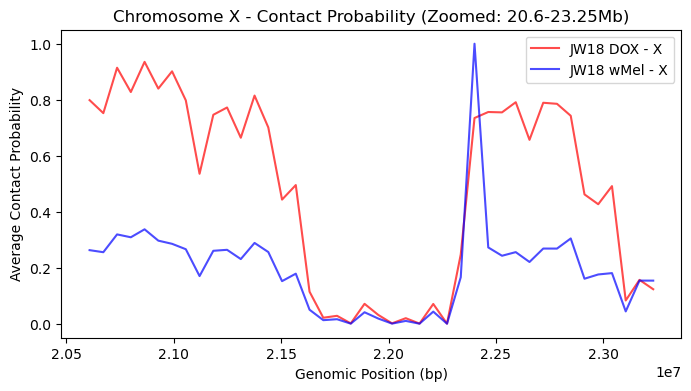

FBgn0024807, FBgn0053502, FBgn0052819, FBgn0040028, FBgn0052820, FBgn0027588, FBgn0052857, FBgn0085521, FBgn0265923, FBgn0267704, FBgn0285970, FBgn0288729, FBgn0288730, FBgn0288731, FBgn0288732, FBgn0288733, FBgn0288734, FBgn0288735, FBgn0288736, FBgn0288737, FBgn0288738, FBgn0288739, FBgn0288740, FBgn0288741, FBgn0288742, FBgn0288743, FBgn0288744, FBgn0288745, FBgn0288746, FBgn0288747


In [25]:
# Define zoom-in region (example: Chromosome X, 21.60 Mb to 22.25 Mb)
chromosome_of_interest = "X"
start_bp = 20600000
end_bp = 23250000


print(f"Genes in the region {chromosome_of_interest}:{start_bp}-{end_bp}:")
plot_regions()
report_genes_in_region(start_bp=21600000, end_bp=22250000)
ROI.append((chromosome_of_interest, start_bp, end_bp))


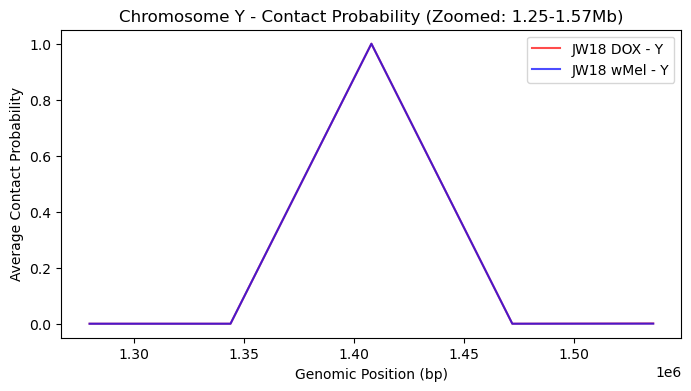

FBgn0024362, FBgn0024361, FBgn0024364, FBgn0029573, FBgn0024987, FBgn0023169, FBgn0052813, FBgn0024985, FBgn0027795, FBgn0024986, FBgn0000826, FBgn0024365, FBgn0024360, FBgn0259108, FBgn0263552, FBgn0265139


In [26]:
# Define zoom-in region (example: Chromosome Y, 1.34 Mb to 1.44 Mb)
chromosome_of_interest = "Y"
start_bp = 1250000
end_bp = 1570000

plot_regions()
report_genes_in_region(start_bp=1340000, end_bp=1460000)
ROI.append((chromosome_of_interest, start_bp, end_bp))


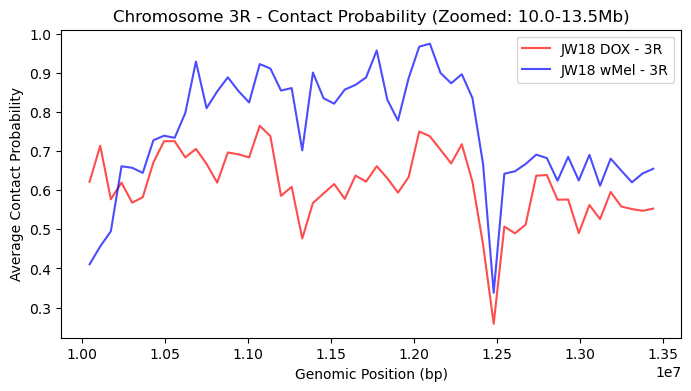

FBgn0030189, FBgn0028480, FBgn0030195, FBgn0000711, FBgn0030200, FBgn0030206, FBgn0030208, FBgn0052687, FBgn0030207, FBgn0030204, FBgn0052683, FBgn0030202, FBgn0030196, FBgn0052681, FBgn0052686, FBgn0052679, FBgn0028331, FBgn0030191, FBgn0011770, FBgn0040942, FBgn0067052, FBgn0030217, FBgn0030223, FBgn0052677, FBgn0003204, FBgn0030228, FBgn0052672, FBgn0052675, FBgn0030230, FBgn0052676, FBgn0030224, FBgn0052673, FBgn0030222, FBgn0030221, FBgn0030218, FBgn0001206, FBgn0030215, FBgn0052656, FBgn0011754, FBgn0000259, FBgn0065046, FBgn0001624, FBgn0052652, FBgn0083167, FBgn0003366, FBgn0030336, FBgn0030262, FBgn0083979, FBgn0085350, FBgn0085351, FBgn0085352, FBgn0085377, FBgn0085443, FBgn0250871, FBgn0259101, FBgn0259143, FBgn0259170, FBgn0259241, FBgn0259918, FBgn0260780, FBgn0260812, FBgn0261277, FBgn0261710, FBgn0262335, FBgn0262685, FBgn0262686, FBgn0262687, FBgn0262740, FBgn0262847, FBgn0262848, FBgn0262849, FBgn0262850, FBgn0262851, FBgn0262852, FBgn0262853, FBgn0263072, FBgn0263111,

In [27]:
# Define zoom-in region (example: Chromosome 3R, 10.25 Mb to 12.5 Mb)
chromosome_of_interest = "3R"
start_bp = 10000000
end_bp = 13500000

plot_regions()
report_genes_in_region(start_bp=10250000, end_bp=12500000)
ROI.append((chromosome_of_interest, start_bp, end_bp))


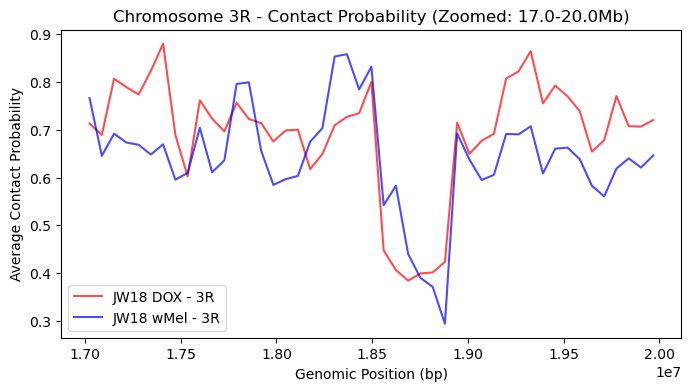

FBgn0085430, FBgn0085451, FBgn0259198, FBgn0259231, FBgn0259927, FBgn0262981, FBgn0263503, FBgn0265598, FBgn0265916, FBgn0265918, FBgn0265919, FBgn0266115, FBgn0267068, FBgn0267069, FBgn0267070, FBgn0267274, FBgn0283473, FBgn0030931, FBgn0027087, FBgn0030938, FBgn0052546, FBgn0030943, FBgn0001079, FBgn0004959, FBgn0030949, FBgn0030952, FBgn0030951, FBgn0010383, FBgn0030947, FBgn0030946, FBgn0030945, FBgn0030944, FBgn0027335, FBgn0030941, FBgn0030940, FBgn0030937, FBgn0030936, FBgn0030933, FBgn0030932, FBgn0010194, FBgn0030955, FBgn0030958, FBgn0030960, FBgn0030961, FBgn0030963, FBgn0030964, FBgn0030969, FBgn0052544, FBgn0030973, FBgn0030975, FBgn0030976, FBgn0030974, FBgn0030970, FBgn0030968, FBgn0030966, FBgn0001090, FBgn0030959, FBgn0030956, FBgn0030954


In [28]:
# Define zoom-in region (example: Chromosome 3R, 1.85 Mb to 1.90 Mb)
chromosome_of_interest = "3R"
start_bp = 17000000
end_bp = 20000000

plot_regions()
report_genes_in_region(start_bp=18500000, end_bp=19000000)
ROI.append((chromosome_of_interest, start_bp, end_bp))


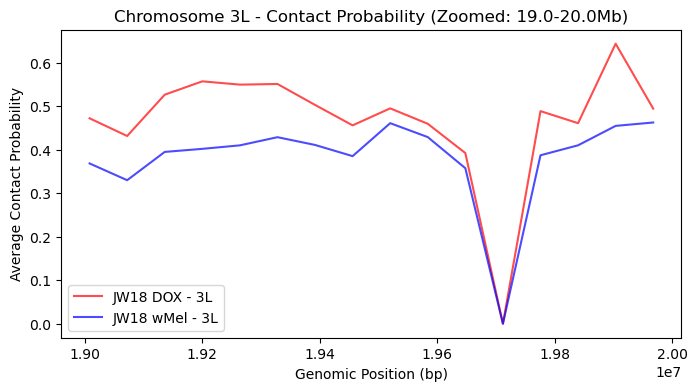

FBgn0031039, FBgn0031038, FBgn0027358, FBgn0031041, FBgn0066304, FBgn0066303, FBgn0086384, FBgn0087008, FBgn0259789, FBgn0265705, FBgn0266179, FBgn0266183, FBgn0267057, FBgn0031037, FBgn0031040, FBgn0031044, FBgn0031045, FBgn0031047, FBgn0031049, FBgn0031052, FBgn0031054, FBgn0004057, FBgn0031057, FBgn0010341, FBgn0031059, FBgn0031058, FBgn0043903, FBgn0031055, FBgn0031053, FBgn0031051, FBgn0031050, FBgn0031048, FBgn0031043, FBgn0031042, FBgn0031062, FBgn0031064, FBgn0010380, FBgn0031065, FBgn0052528, FBgn0031068, FBgn0031069, FBgn0031070, FBgn0042132, FBgn0040089, FBgn0031061, FBgn0031060, FBgn0031066


In [29]:
# Define zoom-in region (example: Chromosome 3L, 1.95 Mb to 1.96 Mb)
chromosome_of_interest = "3L"
start_bp = 19000000
end_bp = 20000000

plot_regions()
report_genes_in_region(start_bp=19600000, end_bp=19800000)
ROI.append((chromosome_of_interest, start_bp, end_bp))


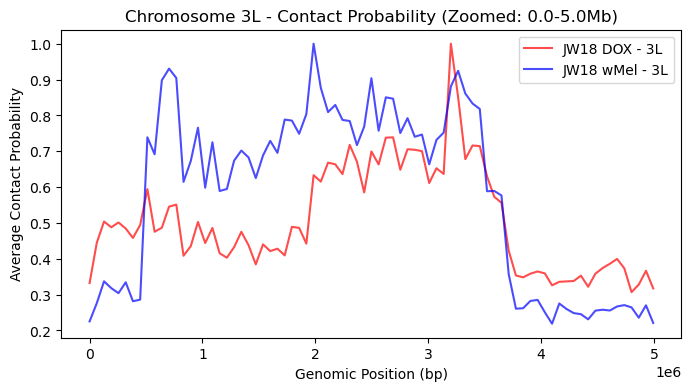

FBgn0023535, FBgn0000108, FBgn0025640, FBgn0025635, FBgn0001341, FBgn0003575, FBgn0025634, FBgn0025638, FBgn0040383, FBgn0040382, FBgn0027343, FBgn0025621, FBgn0029535, FBgn0026874, FBgn0025616, FBgn0015799, FBgn0025620, FBgn0015288, FBgn0029532, FBgn0029531, FBgn0025639, FBgn0002579, FBgn0026879, FBgn0029529, FBgn0025633, FBgn0040892, FBgn0040341, FBgn0029539, FBgn0040339, FBgn0052815, FBgn0040340, FBgn0040347, FBgn0042146, FBgn0029552, FBgn0040337, FBgn0040398, FBgn0040365, FBgn0040397, FBgn0026143, FBgn0040351, FBgn0040338, FBgn0040350, FBgn0040349, FBgn0040348, FBgn0040346, FBgn0040342, FBgn0040345, FBgn0040343, FBgn0052814, FBgn0040364, FBgn0040362, FBgn0040361, FBgn0040360, FBgn0040359, FBgn0040358, FBgn0029568, FBgn0040357, FBgn0040367, FBgn0025642, FBgn0004650, FBgn0024362, FBgn0024361, FBgn0024364, FBgn0029573, FBgn0024987, FBgn0023169, FBgn0052813, FBgn0024985, FBgn0027794, FBgn0027795, FBgn0024986, FBgn0000826, FBgn0024365, FBgn0024360, FBgn0024366, FBgn0025641, FBgn0052811,

In [30]:
# Define zoom-in region (example: Chromosome 3L, 0.05 Mb to 0.4 Mb)
chromosome_of_interest = "3L"
start_bp = 0
end_bp = 5000000

plot_regions()
report_genes_in_region(start_bp=500000, end_bp=3500000)
ROI.append((chromosome_of_interest, start_bp, end_bp))


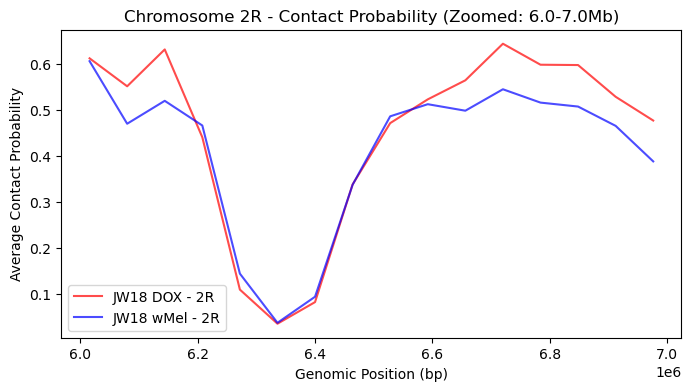

FBgn0029833, FBgn0029834, FBgn0029835, FBgn0029843, FBgn0029849, FBgn0003514, FBgn0029848, FBgn0040069, FBgn0052751, FBgn0052750, FBgn0026060, FBgn0029840, FBgn0029839, FBgn0029838, FBgn0029837, FBgn0003302, FBgn0029003, FBgn0029851, FBgn0015818, FBgn0029853, FBgn0028982, FBgn0029857, FBgn0029858, FBgn0029861, FBgn0029863, FBgn0029864, FBgn0029866, FBgn0029867, FBgn0052748, FBgn0029873, FBgn0014031, FBgn0000524, FBgn0014026, FBgn0029874, FBgn0003139, FBgn0003655, FBgn0016974, FBgn0029868, FBgn0043796, FBgn0028685, FBgn0026015, FBgn0029856, FBgn0052745, FBgn0040918, FBgn0023458, FBgn0029877, FBgn0029878, FBgn0029879, FBgn0029881, FBgn0029880, FBgn0028360, FBgn0062413, FBgn0025815, FBgn0029895, FBgn0029898, FBgn0029502, FBgn0029903, FBgn0029906, FBgn0029907, FBgn0029909, FBgn0029905, FBgn0003390, FBgn0052740, FBgn0029897, FBgn0029896, FBgn0029894, FBgn0029893, FBgn0029892, FBgn0029887, FBgn0029885, FBgn0029882, FBgn0029912, FBgn0029914, FBgn0029920, FBgn0052733, FBgn0029922, FBgn0029924,

In [31]:
# Define zoom-in region (example: Chromosome 2R, 6.0 Mb to 7.0 Mb)
chromosome_of_interest = "2R"
start_bp = 6000000
end_bp = 7000000

plot_regions()
report_genes_in_region(start_bp=6000000, end_bp=7000000)
ROI.append((chromosome_of_interest, start_bp, end_bp))


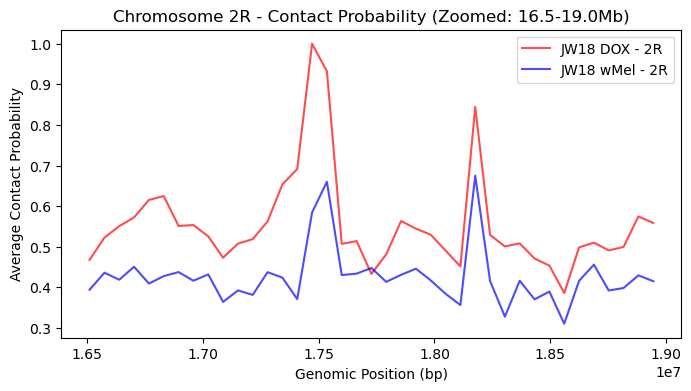

FBgn0052495, FBgn0030844, FBgn0030863, FBgn0030874, FBgn0250788, FBgn0259168, FBgn0261570, FBgn0263258, FBgn0264713, FBgn0264955, FBgn0265902, FBgn0267967, FBgn0283469, FBgn0030847, FBgn0030846, FBgn0026313, FBgn0030853, FBgn0030855, FBgn0026192, FBgn0024184, FBgn0026058, FBgn0030870, FBgn0000617, FBgn0030872, FBgn0052557, FBgn0052554, FBgn0030873, FBgn0030871, FBgn0030869, FBgn0030868, FBgn0030864, FBgn0030859, FBgn0030858, FBgn0026375, FBgn0030854, FBgn0030851, FBgn0030850, FBgn0028343, FBgn0030876, FBgn0030878, FBgn0030881, FBgn0030880, FBgn0030882, FBgn0052496, FBgn0030884, FBgn0030883, FBgn0030877


In [32]:
# Define zoom-in region (example: Chromosome 2R, 1.75 Mb to 1.80 Mb)
chromosome_of_interest = "2R"
start_bp = 16500000
end_bp = 19000000

plot_regions()
report_genes_in_region(start_bp=17500000, end_bp=18000000)
ROI.append((chromosome_of_interest, start_bp, end_bp))


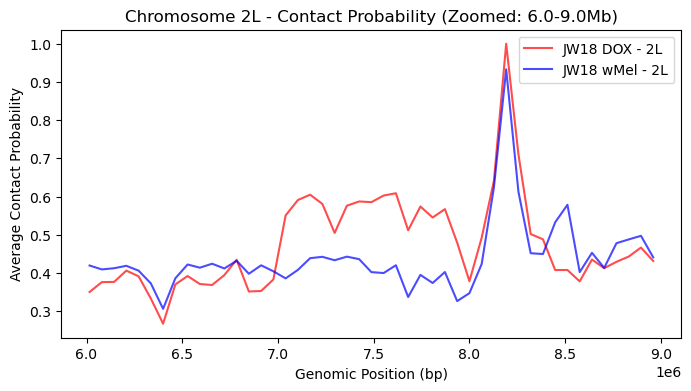

FBgn0052736, FBgn0029929, FBgn0029931, FBgn0004143, FBgn0029932, FBgn0029937, FBgn0047092, FBgn0027342, FBgn0029936, FBgn0029935, FBgn0029930, FBgn0029928, FBgn0000330, FBgn0029939, FBgn0029940, FBgn0029942, FBgn0029944, FBgn0029945, FBgn0026144, FBgn0029947, FBgn0029950, FBgn0040923, FBgn0052726, FBgn0040922, FBgn0029949, FBgn0029946, FBgn0029943, FBgn0025549, FBgn0029951, FBgn0004198, FBgn0022786, FBgn0029957, FBgn0029959, FBgn0016041, FBgn0029961, FBgn0029958, FBgn0027553, FBgn0029955, FBgn0029952, FBgn0052720, FBgn0052719, FBgn0052718, FBgn0029962, FBgn0029964, FBgn0029966, FBgn0029968, FBgn0040087, FBgn0010292, FBgn0029975, FBgn0029976, FBgn0004403, FBgn0004404, FBgn0029987, FBgn0003447, FBgn0003656, FBgn0029986, FBgn0027280, FBgn0029980, FBgn0029979, FBgn0029977, FBgn0029974, FBgn0053222, FBgn0260447, FBgn0029971, FBgn0029970, FBgn0029969, FBgn0029965, FBgn0029963, FBgn0029941, FBgn0000427, FBgn0029948, FBgn0029504, FBgn0024250, FBgn0082924, FBgn0085366, FBgn0085367, FBgn0259098,

In [33]:
# Define zoom-in region (example: Chromosome 2L, 0.5 Mb to 0.8 Mb)
chromosome_of_interest = "2L"
start_bp = 6000000
end_bp = 9000000

plot_regions()
report_genes_in_region(start_bp=7000000, end_bp=8000000)
report_genes_in_region(start_bp=8000000, end_bp=8500000)
ROI.append((chromosome_of_interest, start_bp, end_bp))


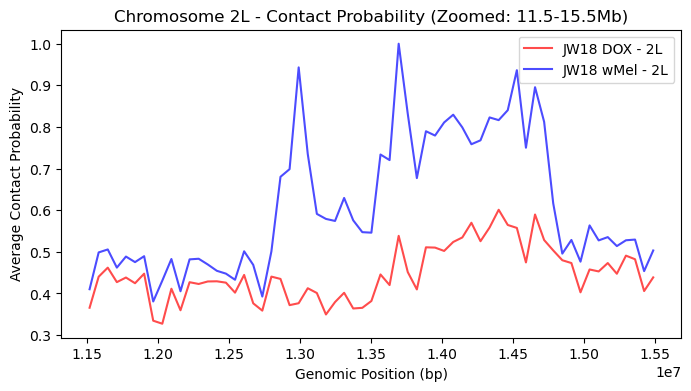

FBgn0030538, FBgn0030545, FBgn0026713, FBgn0030552, FBgn0030554, FBgn0260482, FBgn0030558, FBgn0002917, FBgn0030562, FBgn0030559, FBgn0030556, FBgn0030555, FBgn0030551, FBgn0040153, FBgn0053236, FBgn0053237, FBgn0053238, FBgn0053239, FBgn0053240, FBgn0053241, FBgn0053242, FBgn0053243, FBgn0053244, FBgn0053245, FBgn0053246, FBgn0053247, FBgn0002873, FBgn0052602, FBgn0004169, FBgn0003218, FBgn0041210, FBgn0065101, FBgn0004047, FBgn0011837, FBgn0053963, FBgn0030522, FBgn0052625, FBgn0030542, FBgn0085353, FBgn0085440, FBgn0086674, FBgn0086675, FBgn0250862, FBgn0259166, FBgn0259171, FBgn0261085, FBgn0261244, FBgn0261524, FBgn0262108, FBgn0262187, FBgn0262222, FBgn0262682, FBgn0263005, FBgn0263530, FBgn0263627, FBgn0264381, FBgn0264678, FBgn0264941, FBgn0265416, FBgn0265523, FBgn0265597, FBgn0265609, FBgn0265610, FBgn0265629, FBgn0265630, FBgn0265726, FBgn0265761, FBgn0265830, FBgn0265831, FBgn0265832, FBgn0265865, FBgn0265866, FBgn0265868, FBgn0265869, FBgn0266114, FBgn0266278, FBgn0266376,

In [34]:
# Define zoom-in region (example: Chromosome 2L, 0.5 Mb to 0.8 Mb)
chromosome_of_interest = "2L"
start_bp = 11500000
end_bp = 15500000

plot_regions()
report_genes_in_region(start_bp=12550000, end_bp=14550000)
ROI.append((chromosome_of_interest, start_bp, end_bp))


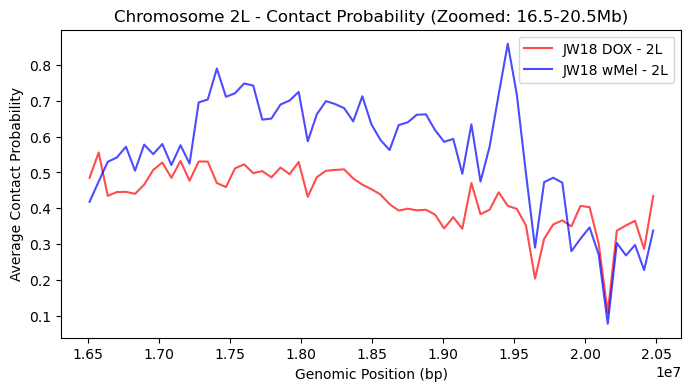

FBgn0017418, FBgn0030887, FBgn0030892, FBgn0003380, FBgn0003189, FBgn0052495, FBgn0052568, FBgn0025743, FBgn0030764, FBgn0030763, FBgn0053542, FBgn0031016, FBgn0030844, FBgn0052547, FBgn0031039, FBgn0031038, FBgn0053639, FBgn0065084, FBgn0027358, FBgn0031041, FBgn0066304, FBgn0066303, FBgn0002709, FBgn0028581, FBgn0047095, FBgn0000152, FBgn0030778, FBgn0030863, FBgn0024941, FBgn0030898, FBgn0030984, FBgn0030874, FBgn0030897, FBgn0082999, FBgn0083010, FBgn0083009, FBgn0083041, FBgn0083040, FBgn0083001, FBgn0083008, FBgn0083012, FBgn0083000, FBgn0083011, FBgn0083042, FBgn0082998, FBgn0083007, FBgn0085354, FBgn0085356, FBgn0085357, FBgn0085358, FBgn0085359, FBgn0085430, FBgn0085451, FBgn0086384, FBgn0086671, FBgn0086778, FBgn0087008, FBgn0250788, FBgn0259168, FBgn0259198, FBgn0259223, FBgn0259231, FBgn0259789, FBgn0259834, FBgn0259923, FBgn0259927, FBgn0260238, FBgn0260747, FBgn0260748, FBgn0261245, FBgn0261461, FBgn0261570, FBgn0261573, FBgn0261791, FBgn0262101, FBgn0262111, FBgn0262181,

In [35]:
# Define zoom-in region (example: Chromosome 2L, 0.5 Mb to 0.8 Mb)
chromosome_of_interest = "2L"
start_bp = 16500000
end_bp = 20500000

plot_regions()
report_genes_in_region(start_bp=16600000, end_bp=19800000)
ROI.append((chromosome_of_interest, start_bp, end_bp))


In [36]:
'''
Generage BigWig files for the contact traces 
'''

import cooler
import numpy as np
import pandas as pd
import pyBigWig

# Define the resolution
resolution = 1000  # Change as needed

# Load Hi-C data
clr1 = cooler.Cooler(f"/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/JW18-DOX.matrix_1kb.mcool::/resolutions/{resolution}")
clr2 = cooler.Cooler(f"/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/JW18-wMel.matrix_1kb.mcool::/resolutions/{resolution}")

# Extract chromosome names
chromosomes = clr1.chromnames

# Output directory for BigWig files
output_dox = f"JW18-DOX_{resolution}.bw"
output_wmel = f"JW18-wMel_{resolution}.bw"

# Create BigWig objects
bw_dox = pyBigWig.open(output_dox, "w")
bw_wmel = pyBigWig.open(output_wmel, "w")

# Get chromosome sizes from Cooler file
chrom_sizes = [(chrom, clr1.chromsizes[chrom]) for chrom in chromosomes]

# Assign chromosome sizes to BigWig files
bw_dox.addHeader(chrom_sizes)
bw_wmel.addHeader(chrom_sizes)

for chrom in chromosomes:
    try:
        # Fetch Hi-C contact matrix
        matrix_dox = clr1.matrix(balance=False, sparse=True).fetch(chrom)
        matrix_wmel = clr2.matrix(balance=False, sparse=True).fetch(chrom)

        # Convert sparse to dense
        matrix_dox_dense = np.array(matrix_dox.todense())
        matrix_wmel_dense = np.array(matrix_wmel.todense())

        # Compute mean contact probability
        contact_dox = matrix_dox_dense.mean(axis=1)
        contact_wmel = matrix_wmel_dense.mean(axis=1)

        # Normalize values (prevent division by zero)
        if np.max(contact_dox) > 0:
            contact_dox = contact_dox / np.max(contact_dox)
        if np.max(contact_wmel) > 0:
            contact_wmel = contact_wmel / np.max(contact_wmel)

        # Get genomic positions
        bin_table = clr1.bins().fetch(chrom)
        genomic_positions = bin_table["start"].values

        # Create entries for BigWig
        intervals = [(chrom, genomic_positions[i], genomic_positions[i] + resolution, float(contact_dox[i])) for i in range(len(genomic_positions))]
        intervals_wmel = [(chrom, genomic_positions[i], genomic_positions[i] + resolution, float(contact_wmel[i])) for i in range(len(genomic_positions))]

        # Add entries to BigWig files
        bw_dox.addEntries(
            [x[0] for x in intervals],  # Chromosome
            [x[1] for x in intervals],  # Start
            ends=[x[2] for x in intervals],  # End
            values=[x[3] for x in intervals]  # Value
        )

        bw_wmel.addEntries(
            [x[0] for x in intervals_wmel],
            [x[1] for x in intervals_wmel],
            ends=[x[2] for x in intervals_wmel],
            values=[x[3] for x in intervals_wmel]
        )

    except Exception as e:
        print(f"Skipping chromosome {chrom} due to an issue: {e}")

# Close BigWig files
bw_dox.close()
bw_wmel.close()

print(f"BigWig files saved: {output_dox}, {output_wmel}")

BigWig files saved: JW18-DOX_1000.bw, JW18-wMel_1000.bw


In [38]:
import os
directory='/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks'
os.system(f"mv {output_dox} {directory}")
os.system(f"mv {output_wmel} {directory}")


0

In [39]:
import os
import coolbox
from coolbox.api import *
import pandas as pd
from math import floor

# change working directory
os.chdir("/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/")
print(f"Current working directory: {os.path.abspath(os.curdir)}")

Current working directory: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped


In [40]:
# # Browser for given ranges:
# directory = '/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots/'

# chromosome_of_interest = "2L"
# start_bp = 6000000
# end_bp = 9000000


# c
# resolution = '1kb'
# TEST_RANGE = f'{chromosome_of_interest}:{start_bp}-{end_bp}'
# resolution = 1000

# JW18_DOX  = 'red'
# JW18_wMel = 'blue'

# clr1 = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/JW18-DOX.matrix_1kb.mcool"
# clr2 = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/JW18-wMel.matrix_1kb.mcool"

# #all genes
# gtf_all='/private/groups/russelllab/jodie/reference_genomes/micro-c/dmel-all-r6.46.sorted.uniq.gtf'

# # File paths (TADs stored in the same format as .diffloop files)
# loops1 = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/mustache/mustache_v5/1kb/JW18-DOX_JW18-wMel.diffloop1"
# loops2 = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/mustache/mustache_v5/1kb/JW18-DOX_JW18-wMel.diffloop2"


# ###Tracks
# #RNA-coverage 
# rnaseq_cov ='/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18wMel221117_vs_DOX.diff.coverage.bw'

# #Micro-C_coverage 
# microc_cov ='/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-wMel_vs_DOX.diff.coverage.bw'

# #Mappability 
# mappability ='/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/dmel_6_genmap_e0_k150_final.bw'

# c1,c2=clr1, clr2


# with MinValue(-9), MaxValue(-1):
#     cool1 = Cool(clr1)
#     cool2 = Cool(clr2)

# frame = ChromName()+ XAxis() + \
#     Selfish(cool2, cool1, norm="log", cmap='bwr') +Title("FDR Corrected\np-value")+ \
#     MinValue(0.00001) + MaxValue(0.1)  + \
#     HiCDiff(cool2, cool1, normalize='log', diff_method='diff', cmap='bwr') + Title("Differential\nChromatin\nInteractions") + \
#     MinValue(-6) + MaxValue(6)  + \
#     TADCoverage(loops1, border_only=False, alpha=0.45, color=JW18_DOX,border_color=JW18_DOX) +\
#     TADCoverage(loops2, border_only=False, alpha=0.25, color=JW18_wMel,border_color=JW18_wMel) +\
#     GTF(gtf_all)+Title(f"Genetic elements\nenriched in\n{c1}")+ TrackHeight(3)+\
#     Spacer(height=.5) +\
#     BigWig(rnaseq_cov) + Color(JW18_wMel) + MinValue(0) + MaxValue(500)+ Title("RNA-seq coverage\nJW18-wMel enrichment\nover JW18-DOX")+TrackHeight(1)+\
#     BigWig(rnaseq_cov) + Color(JW18_DOX) + MinValue(-500) + MaxValue(0)+ TrackHeight(1)+\
#     Spacer(height=.5) +\
#     BigWig(microc_cov) + Color(JW18_wMel) + MinValue(0) + MaxValue(1000)+ Title("Micro-C coverage\nJW18-wMel enrichment\nover JW18-DOX")+TrackHeight(1)+\
#     BigWig(microc_cov) + Color(JW18_DOX) + MinValue(-1000) + MaxValue(0)+ TrackHeight(1)+\
#     Spacer(height=.5) +\
#     BigWig(mappability) + MinValue(0) + MaxValue(1)+ Title("Mappability")+TrackHeight(1) +\
#     XAxis()
# frame *= Feature(depth_ratio=0.35)
# frame.plot(TEST_RANGE)

# bsr = Browser(frame, reference_genome='/private/groups/russelllab/jodie/reference_genomes/micro-c/dmel-all-chromosome_only-r6.46.genome')
# bsr.goto(TEST_RANGE)
# bsr.show()
# # bsr.save(f'{directory}/{comparison}_{TEST_RANGE}.svg')
# # print(f"File saved to: {directory}/{comparison}_{TEST_RANGE}.svg")

In [ ]:
from coolbox.api import *

directory = '/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots/'

comparison = 'JW18-DOX_JW18-wMel' 
chromosome_of_interest = "2L"
start_bp = 6000000
end_bp = 9000000
TEST_RANGE = f'{chromosome_of_interest}:{start_bp}-{end_bp}'
resolution = 1000

JW18_DOX = 'red'
JW18_wMel = 'blue'

clr1 = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/JW18-DOX.matrix_1kb.mcool"
clr2 = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/processed_files/JW18-wMel.matrix_1kb.mcool"

# Path to the new BigWig files
bw_dox = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_1000.bw"
bw_wmel = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-wMel_1000.bw"

# Additional Tracks
gtf_all = s
loops1 = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1"
loops2 = "/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2"
rnaseq_cov = '/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18wMel221117_vs_DOX.diff.coverage.bw'
microc_cov = '/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-wMel_vs_DOX.diff.coverage.bw'
mappability = '/private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/dmel_6_genmap_e0_k150_final.bw'

c1, c2 = clr1, clr2

with MinValue(-9), MaxValue(-1):
    cool1 = Cool(clr1)
    cool2 = Cool(clr2)

frame = ChromName() + XAxis() + \
    HiCMat(clr1, style='window',  cmap='Reds') +\
    TADCoverage(loops1, border_only=True, alpha=1, color='black', border_color='black') +\
    HiCMat(clr2, style='window',  cmap='Blues')+\
    TADCoverage(loops2, border_only=True, alpha=1, color='black', border_color='black') +\
    HiCDiff(clr2, clr1, normalize='log', diff_method='diff', cmap='bwr') + Title("Differential\nChromatin\nInteractions") + \
    GTF(gtf_all) + Title(f"Genetic elements\nenriched in\n{c1}") + TrackHeight(6) + \
    Spacer(height=.5) + \
    BigWig(bw_dox, style="line") + Color(JW18_DOX) + \
    BigWig(bw_wmel, style="line") + Color(JW18_wMel) + \
    MinValue(0) + MaxValue(1) + \
    Title("Contact Probability\nJW18-DOX vs JW18-wMel") + TrackHeight(2)  + Spacer(height=.5) +\
    BigWig(rnaseq_cov) + Color(JW18_wMel) + MinValue(0) + MaxValue(500) + Title("RNA-seq coverage\nJW18-wMel enrichment\nover JW18-DOX") + TrackHeight(1) + \
    BigWig(rnaseq_cov) + Color(JW18_DOX) + MinValue(-500) + MaxValue(0) + TrackHeight(1) + \
    Spacer(height=.5) + \
    BigWig(microc_cov) + Color(JW18_wMel) + MinValue(0) + MaxValue(1000) + Title("Micro-C coverage\nJW18-wMel enrichment\nover JW18-DOX") + TrackHeight(1) + \
    BigWig(microc_cov) + Color(JW18_DOX) + MinValue(-1000) + MaxValue(0) + TrackHeight(1) + \
    Spacer(height=.5) + \
    BigWig(mappability) + MinValue(0) + MaxValue(1) + Title("Mappability") + TrackHeight(1) + \
    XAxis()

frame *= Feature(depth_ratio=0.35)
frame.plot(TEST_RANGE)

bsr = Browser(frame, reference_genome='/private/groups/russelllab/jodie/reference_genomes/micro-c/dmel-all-chromosome_only-r6.46.genome')
bsr.goto(TEST_RANGE)
bsr.show()


# Loop through ROI's:
for roi in ROI:
    TEST_RANGE = f'{roi[0]}:{roi[1]}-{roi[2]}'
    frame.plot(TEST_RANGE)
    bsr.goto(TEST_RANGE)

    # Save output
    bsr.save(f'{directory}/{comparison}_{TEST_RANGE}.svg')
    print(f"File saved to: {directory}/{comparison}_{TEST_RANGE}.svg")

[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi


[WARNING:wrap.py:307 -                fetch()] Genomic region out of bounds: [20070000, 23780000)
[WARNING:wrap.py:308 -                fetch()] Data is not balanced, force to use unbalanced matrix.
[ERROR:frame.py:215 -                 plot()] Error occured when plot track:
	track name: Cool.15
	track type:<class 'coolbox.core.track.hicmat.cool.Cool'>
	Error: <class 'ValueError'> Genomic region out of bounds: [20070000, 23780000)
	occurred in "/private/home/jomojaco/mambaforge/envs/micro-c/lib/python3.10/site-packages/coolbox/core/frame/frame.py", line 209
ERROR:coolbox.core.frame.frame:Error occured when plot track:
	track name: Cool.15
	track type:<class 'coolbox.core.track.hicmat.cool.Cool'>
	Error: <class 'ValueError'> Genomic region out of bounds: [20070000, 23780000)
	occurred in "/private/home/jomojaco/mambaforge/envs/micro-c/lib/python3.10/site-packages/coolbox/core/frame/frame.py", line 209
[ERROR:frame.py:222 -                 plot()] Genomic region out of bounds: [20070000,

File saved to: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots//JW18-DOX_JW18-wMel_X:20600000-23250000.svg


[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[WARNING:plot.py:486 -            plot_tads()] No regions found for Coverage TAD.5.
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[WARNING:plot.py:486 -            plot_tads()] No regions found for Coverage TAD.6.
[WARNING:wrap.py:307 -                fetch()] Genomic region out of bounds: [487351, 4197352)
[WARNING:wrap.py:308 -           

File saved to: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots//JW18-DOX_JW18-wMel_Y:1250000-1570000.svg


[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/mic

File saved to: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots//JW18-DOX_JW18-wMel_3R:10000000-13500000.svg


[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/mic

File saved to: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots//JW18-DOX_JW18-wMel_3R:17000000-20000000.svg


[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[WARNING:plot.py:486 -            plot_tads()] No regions found for Coverage TAD.6.
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is

File saved to: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots//JW18-DOX_JW18-wMel_3L:19000000-20000000.svg


[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi


File saved to: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots//JW18-DOX_JW18-wMel_3L:0-5000000.svg


[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/mic

File saved to: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots//JW18-DOX_JW18-wMel_2R:6000000-7000000.svg


[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/mic

File saved to: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots//JW18-DOX_JW18-wMel_2R:16500000-19000000.svg


[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi


File saved to: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots//JW18-DOX_JW18-wMel_2L:6000000-9000000.svg


[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/mic

File saved to: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots//JW18-DOX_JW18-wMel_2L:11500000-15500000.svg


[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop2.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/mapped/tracks/JW18-DOX_JW18-wMel.diffloop1.bgz.tbi
[W::hts_idx_load3] The index file is older than the data file: /private/groups/russelllab/jodie/wolbachia_induced_DE/mic

File saved to: /private/groups/russelllab/jodie/wolbachia_induced_DE/micro-c/plots//JW18-DOX_JW18-wMel_2L:16500000-20500000.svg
